In [1]:
# Load the Excel file
import pandas as pd
file_path = 'I:/Accenture_Course/Accenture Final DS.xlsx'
xls = pd.ExcelFile(file_path)

In [2]:
#display
sheet_names = xls.sheet_names
print(sheet_names)
df = pd.read_excel(file_path, sheet_name=sheet_names[0])
print(df.head())

['Sheet1']
   Sr. No.                            Content ID  \
0        1  5118e9c5-1377-4cc5-a486-65b35b7b7b76   
1        2  9f737e0a-3cdd-4d29-9d24-753f4e3be810   
2        3  7ffd0a82-4a0a-4527-a4d6-e251b756bac7   
3        4  356fff80-da4d-4785-9f43-bc1261031dc6   
4        5  46fb701d-6c26-458e-ada3-2ebe5dbba01f   

                                User ID         Category     Type  \
0  ef56931b-540b-4166-9090-73ae48ac8d97          Science    Heart   
1  beb1f34e-7870-46d6-9fc7-2e12eb83ce43   Healthy Eating  Dislike   
2  425b7021-0409-4358-af39-2bff14197d0a          Fitness  Dislike   
3  9fb4ce88-fac1-406c-8544-1a899cee7aaf       Technology     Want   
4  4fe1900d-5e78-41a3-88ed-18e6889c6c77  Public Speaking     Want   

             Datetime Sentiments  Score  
0 2020-07-19 19:28:00   Positive     60  
1 2020-11-29 21:33:00   Negative     10  
2 2020-09-22 04:09:00   Negative     10  
3 2020-11-13 00:33:00   Positive     70  
4 2020-12-01 15:06:00   Positive     70  


In [3]:
# Group by 'Category' and sum the 'Score' to find the top 5 categories
category_scores = df.groupby('Category')['Score'].sum()

In [4]:
# Sort the categories by their total scores in descending order and select the top 5
top_categories = category_scores.sort_values(ascending=False).head(5)
print(top_categories)

Category
Animals       2915
Science       2840
Technology    2631
Travel        2600
Fitness       2595
Name: Score, dtype: int64


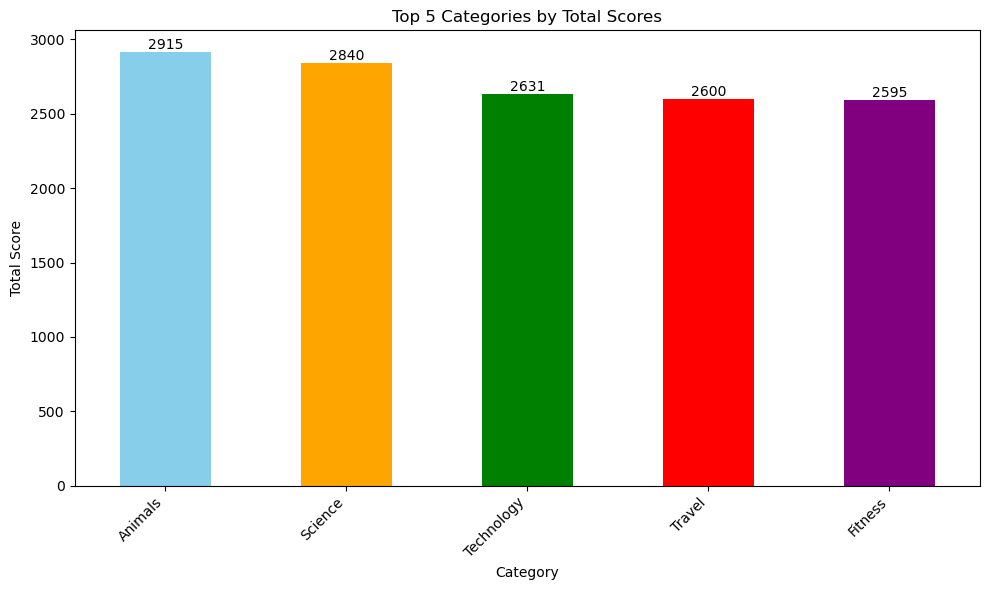

In [16]:
# Plot the top 5 categories with their total scores
colors = ['skyblue', 'orange', 'green', 'red', 'purple']
plt.figure(figsize=(10, 6))
bars = top_categories.plot(kind='bar', color=colors, legend=False)  # Store the plot in 'bars'
plt.title('Top 5 Categories by Total Scores')
plt.xlabel('Category')
plt.ylabel('Total Score')
plt.xticks(rotation=45, ha='right')
# Add values on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             int(bar.get_height()),
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

Sentiment Counts:
 Positive    553
Negative    279
Neutral     108
Name: Sentiments, dtype: int64


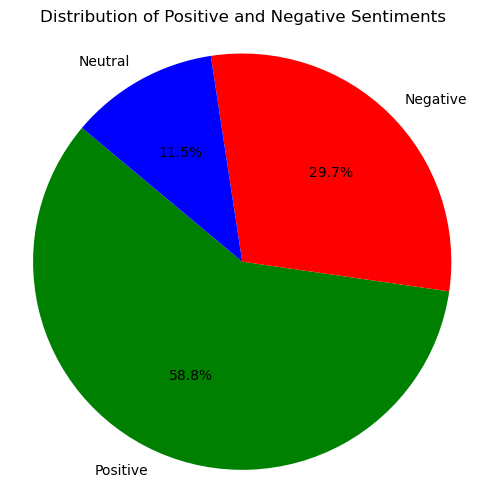

In [6]:
# Step 5: Count the number of positive and negative sentiments
sentiment_counts = df['Sentiments'].value_counts()
print("Sentiment Counts:\n", sentiment_counts)

# Plot the sentiment counts
plt.figure(figsize=(6, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'blue'])
plt.title('Distribution of Positive and Negative Sentiments')
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

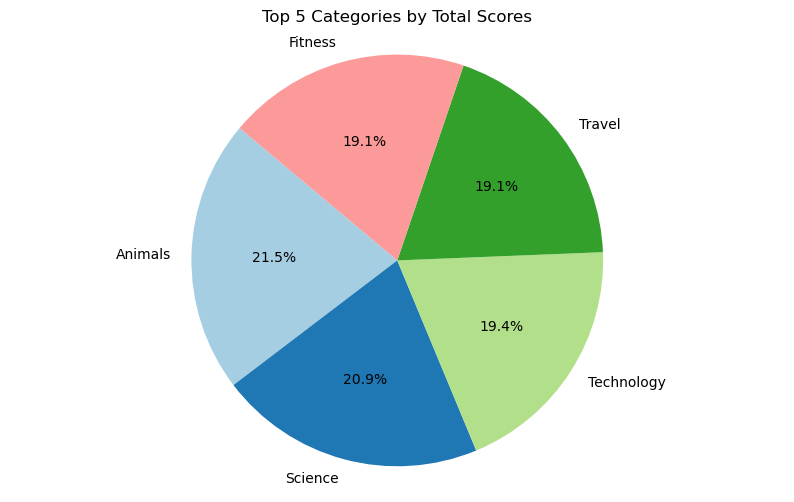

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Categories by Total Scores')
plt.axis('equal')
plt.show()